In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
def check_data_quality(df):
    print("The shape:")
    print(df.shape)

    missing_values = df.isna().sum()
    if missing_values.sum() == 0:
        print("\nNo missing values found.")
    else:
        print("Columns with missing values:")
        print(missing_values[missing_values != 0])

    print("\nData types:")
    print(df.dtypes)
    
    print("\nUnique types:")
    print(df.nunique())

    print("\nSummary Statistics:")
    df.describe()

    df.hist(bins=50, figsize=(20,15))
    
    
    
def position_to_number(pos):
    if pos == 'PG':
        return 1
    elif (pos == 'PG-SG' or pos == 'SG-PG'):
        return 1.5
    elif (pos == 'SG' or pos == 'SG-PG-SF'):
        return 2
    elif (pos == 'SG-SF' or pos == 'SF-SG'):
        return 2.5
    elif pos == 'SF':
        return 3
    elif pos == 'PF-SF':
        return 3.5
    elif pos == 'PF':
        return 4
    elif pos == 'C-PF':
        return 4.5
    elif pos == 'C':
        return 5
    
    

def add_season_column(df):
    seasons = []
    current_season = 1980
    count = 0
    
    for index, row in df.iterrows():
        if row['Rk'] == 1 and count > 100:
            current_season += 1
            count = 0
        count += 1
        seasons.append(current_season)

    df['Season'] = seasons
    df.drop(df.columns[[19, 24, 29]], axis=1, inplace=True)
    df['Pos'] = df['Pos'].apply(position_to_number)
    del df["Rk"]
    df = df.dropna()
    return df

def add_target(group,target):
    group[target + " Next Season"] = group[target].shift(-1)
    group[target + " Next Season"].fillna(0, inplace=True)
    return group

In [3]:
df = add_season_column(pd.read_csv("nba_player_1980-2022.csv"))
df

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,Kareem Abdul-Jabbar*,5.0,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
1,Tom Abernethy,4.0,25.0,GSW,67.0,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.0,-0.2,-1.2,0.2,1980
2,Alvan Adams,5.0,25.0,PHO,75.0,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.7,1.9,3.6,3.1,1980
3,Tiny Archibald*,1.0,31.0,BOS,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3,1980
4,Dennis Awtrey,5.0,31.0,CHI,26.0,560.0,7.4,0.524,0.000,0.833,6.0,16.9,11.5,9.0,1.0,1.5,24.8,7.9,0.1,0.5,0.6,0.053,-2.3,0.9,-1.4,0.1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23142,Thaddeus Young,4.0,34.0,TOR,54.0,795.0,14.1,0.573,0.172,0.131,9.4,14.6,11.8,12.9,3.4,0.6,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4,2023
23143,Trae Young,1.0,24.0,ATL,73.0,2541.0,22.0,0.573,0.331,0.460,2.4,7.0,4.7,42.5,1.5,0.3,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4,2023
23144,Omer Yurtseven,5.0,24.0,MIA,9.0,83.0,16.7,0.675,0.259,0.222,10.9,21.9,16.2,3.9,1.2,2.5,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0,2023
23145,Cody Zeller,5.0,30.0,MIA,15.0,217.0,16.4,0.659,0.034,0.593,13.0,21.8,17.3,7.2,0.7,1.9,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0,2023


In [4]:
df[df['Player'] == 'Stephen Curry'].head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
14285,Stephen Curry,1.0,21.0,GSW,80.0,2896.0,16.3,0.568,0.332,0.175,1.8,12.0,6.8,24.6,2.5,0.5,16.5,21.8,3.0,1.6,4.7,0.077,1.1,-0.5,0.7,2.0,2010
14896,Stephen Curry,1.0,22.0,GSW,74.0,2489.0,19.4,0.595,0.325,0.216,2.3,10.9,6.5,28.1,2.2,0.6,16.4,24.4,5.4,1.3,6.6,0.128,3.0,-0.7,2.3,2.7,2011
15477,Stephen Curry,1.0,23.0,GSW,26.0,732.0,21.2,0.605,0.409,0.159,2.3,11.3,6.8,32.3,2.8,0.8,17.0,24.0,1.8,0.4,2.2,0.144,4.1,0.3,4.3,1.2,2012
16038,Stephen Curry,1.0,24.0,GSW,78.0,2983.0,21.3,0.589,0.432,0.210,2.3,9.1,5.8,31.1,2.1,0.3,13.7,26.4,8.4,2.8,11.2,0.180,5.3,0.1,5.4,5.6,2013
16642,Stephen Curry,1.0,25.0,GSW,78.0,2846.0,24.1,0.610,0.445,0.252,1.8,10.9,6.4,39.9,2.2,0.4,16.1,28.3,9.3,4.0,13.4,0.225,6.3,1.1,7.4,6.7,2014


The shape:
(22963, 27)

No missing values found.

Data types:
Player     object
Pos       float64
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season      int64
dtype: object

Unique types:
Player    3463
Pos          9
Age         27
Tm          41
G           85
MP        3217
PER        569
TS%        630
3PAr       862
FTr        920
ORB%       314
DRB%       421
TRB%       328
AST%       520
STL%       119
BLK%       138
TOV%       413
USG%       417
OWS        174
DWS         88
WS         203
WS/48      825
OBPM       391
DBPM       238
BPM        473
VORP       128
Season      44
dtype: int64

Summ

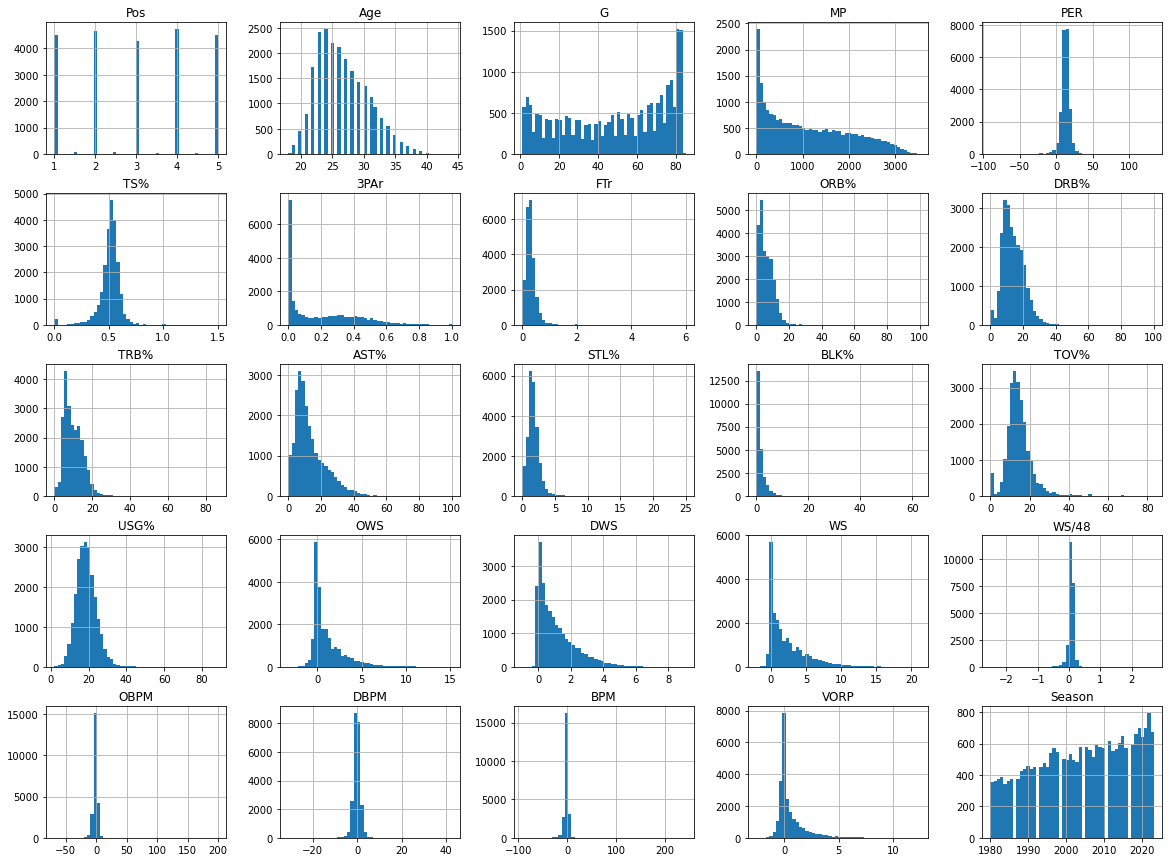

In [5]:
check_data_quality(df)

# prepairing the data 

In [6]:
df['Player'] = df['Player'].str.rstrip('*')
df_filtered = df[df['G'] > 20]

df = df.groupby("Player").apply(lambda x: add_target(x, 'WS'))
df = df.groupby("Player").apply(lambda x: add_target(x, 'PER'))

# Supervised
Exploratory data analysis

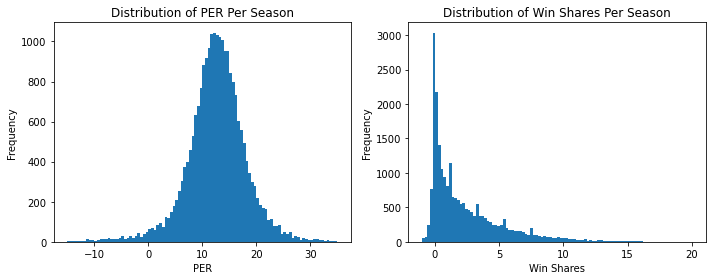

In [7]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for PER
axs[0].hist(df['PER'], bins=100, range=(-15, 35))
axs[0].set_title('Distribution of PER Per Season')
axs[0].set_xlabel('PER')
axs[0].set_ylabel('Frequency')

# Plot the histogram for Win Shares (WS)
axs[1].hist(df['WS'], bins=100, range=(-1, 20))
axs[1].set_title('Distribution of Win Shares Per Season')
axs[1].set_xlabel('Win Shares')
axs[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

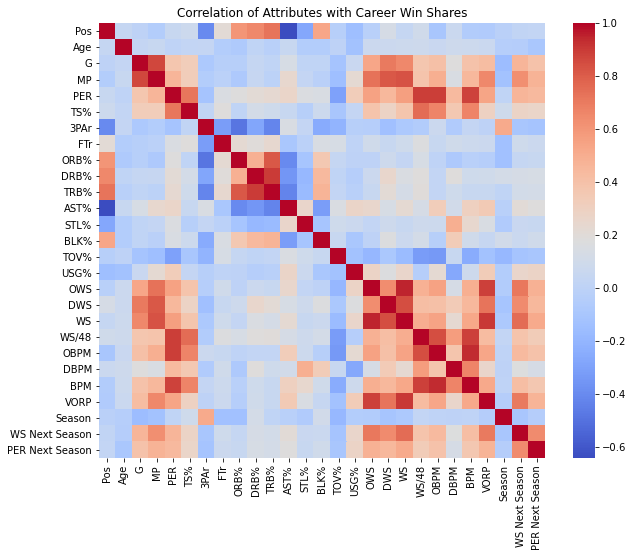

In [8]:
# Calculate the correlation matrix
correlation_matrix = df[df.columns.tolist()].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Attributes with Career Win Shares')
plt.show()

# start ML

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor

def generate_predictions(model, X):
    predictions = model.predict(X)
    return predictions

def evaluate_models(models, X, y, test_size=0.2, random_state=42):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model_name, model in models:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Generate predictions on the entire dataset
        predictions = generate_predictions(model, X_test)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store the results in a dictionary
        result = {
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2,
        }
        results.append(result)

    metrics_df = pd.DataFrame(results)
    return metrics_df

In [10]:
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Huber Regression', HuberRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('SVR', SVR()),
    ('MLP', MLPRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Kernel Ridge', KernelRidge())
]

removed_columns = ['Season', 'Player', 'Tm', 'OWS', 'WS Next Season', 'PER Next Season']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

X_WS = df[selected_columns].values
y_WS = df['WS Next Season'].values

X_PER = df[selected_columns].values
y_PER = df['PER Next Season'].values

# Choose the 'Gradient Boosting' model

In [11]:
# Split data for WS model
X_train_WS, X_test_WS, y_train_WS, y_test_WS = train_test_split(X_WS, y_WS, test_size=0.2)

# Train WS model
extra_trees_WS = GradientBoostingRegressor()
extra_trees_WS.fit(X_train_WS, y_train_WS)

# Make predictions for WS
predictions_WS = extra_trees_WS.predict(X_test_WS)

In [12]:
# Split data for PER model
X_train_PER, X_test_PER, y_train_PER, y_test_PER = train_test_split(X_PER, y_PER, test_size=0.2)

# Train PER model
extra_trees_PER = GradientBoostingRegressor()
extra_trees_PER.fit(X_train_PER, y_train_PER)

# Make predictions for PER
predictions_PER = extra_trees_PER.predict(X_test_PER)

In [13]:
# Create DataFrame for WS predictions
df_test = pd.DataFrame(X_test_WS, columns=selected_columns)


# Add the removed columns to df_test_WS
for column in removed_columns:
    df_test[column] = df[column]

df_test['WS Next Season'] = y_test_WS
df_test['PER Next Season'] = y_test_PER

df_test['WS_Prediction'] = predictions_WS
df_test['PER_Prediction'] = predictions_PER

In [14]:
importances_WS = extra_trees_WS.feature_importances_
feature_importance_df_WS = pd.DataFrame({'Feature': selected_columns, 'Importance': importances_WS})
feature_importance_df_WS = feature_importance_df_WS.sort_values(by='Importance', ascending=False)

importances_PER = extra_trees_PER.feature_importances_
feature_importance_df_PER = pd.DataFrame({'Feature': selected_columns, 'Importance': importances_PER})
feature_importance_df_PER = feature_importance_df_PER.sort_values(by='Importance', ascending=False)

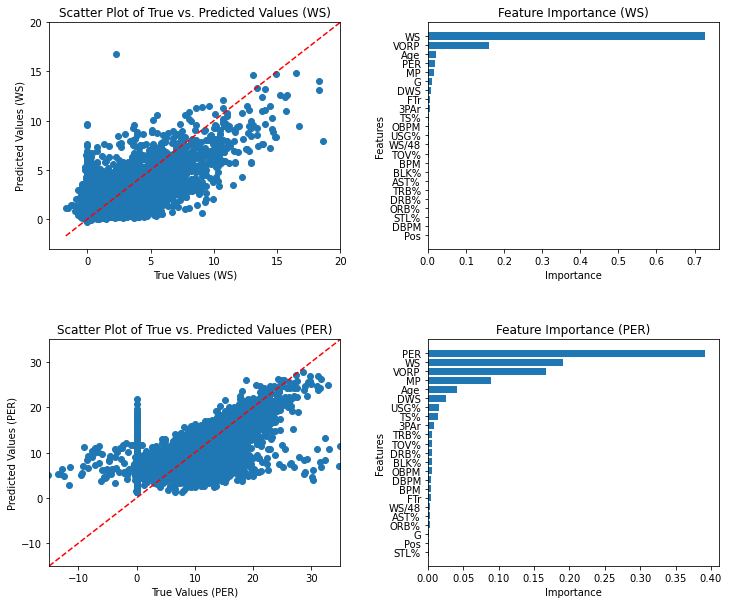

In [15]:
# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of True vs. Predicted Values for WS
ax1.scatter(y_test_WS, predictions_WS)
ax1.plot([min(y_test_WS), max(y_test_WS)], [min(y_test_WS), max(y_test_WS)], color='red', linestyle='--')
ax1.set_xlabel('True Values (WS)')
ax1.set_ylabel('Predicted Values (WS)')
ax1.set_title('Scatter Plot of True vs. Predicted Values (WS)')
ax1.set_xlim(-3, 20)  # Adjust x-axis limits
ax1.set_ylim(-3, 20)  # Adjust y-axis limits

# Bar plot of Feature Importance for WS
ax2.barh(feature_importance_df_WS['Feature'], feature_importance_df_WS['Importance'])
ax2.set_xlabel('Importance')
ax2.set_ylabel('Features')
ax2.set_title('Feature Importance (WS)')
ax2.invert_yaxis()  # Invert the y-axis to display features from top to bottom

# Scatter plot of True vs. Predicted Values for PER
ax3.scatter(y_test_PER, predictions_PER)
ax3.plot([min(y_test_PER), max(y_test_PER)], [min(y_test_PER), max(y_test_PER)], color='red', linestyle='--')
ax3.set_xlabel('True Values (PER)')
ax3.set_ylabel('Predicted Values (PER)')
ax3.set_title('Scatter Plot of True vs. Predicted Values (PER)')
ax3.set_xlim(-15, 35)  # Adjust x-axis limits
ax3.set_ylim(-15, 35)  # Adjust y-axis limits

# Bar plot of Feature Importance for PER
ax4.barh(feature_importance_df_PER['Feature'], feature_importance_df_PER['Importance'])
ax4.set_xlabel('Importance')
ax4.set_ylabel('Features')
ax4.set_title('Feature Importance (PER)')
ax4.invert_yaxis()  # Invert the y-axis to display features from top to bottom

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Display the figure
plt.show()

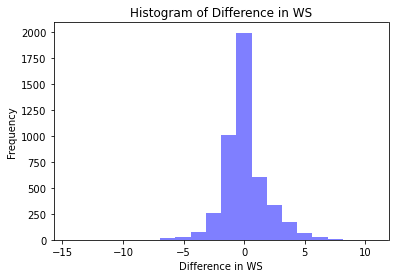

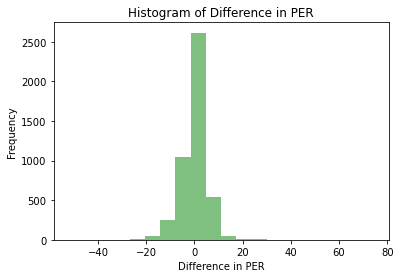

In [16]:
df_test['diff_WS'] = df_test['WS Next Season'] - df_test['WS_Prediction']
df_test['diff_PER'] = df_test['PER Next Season'] - df_test['PER_Prediction']

# Create histograms for the differences
plt.hist(df_test['diff_WS'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Difference in WS')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in WS')
plt.show()

plt.hist(df_test['diff_PER'], bins=20, color='green', alpha=0.5)
plt.xlabel('Difference in PER')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in PER')
plt.show()

In [17]:
df_test

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Player,Tm,OWS,WS Next Season,PER Next Season,WS_Prediction,PER_Prediction,diff_WS,diff_PER
0,5.0,32.0,24.0,431.0,9.2,0.504,0.009,0.394,7.6,17.0,12.6,4.3,0.2,5.4,17.4,17.2,0.8,0.6,0.065,-5.4,1.3,-4.2,-0.2,1980.0,Kareem Abdul-Jabbar,LAL,9.5,1.1,9.8,0.807232,10.113836,0.292768,-0.313836
1,3.0,21.0,74.0,1131.0,9.4,0.498,0.367,0.272,3.2,12.9,7.8,12.0,1.7,1.9,16.4,17.9,1.1,0.6,0.025,-4.2,0.0,-4.2,-0.6,1980.0,Tom Abernethy,GSW,1.2,0.1,13.3,1.134802,10.358867,-1.034802,2.941133
2,3.0,25.0,82.0,2819.0,18.4,0.578,0.011,0.322,6.7,11.4,9.2,11.2,1.8,1.6,10.9,22.3,3.4,9.3,0.158,2.3,0.3,2.6,3.3,1980.0,Alvan Adams,PHO,3.1,7.9,15.2,7.443789,12.995506,0.456211,2.204494
3,4.0,29.0,42.0,446.0,6.4,0.397,0.179,0.513,9.9,13.4,11.6,3.9,1.2,2.5,18.0,11.7,0.3,-0.1,-0.006,-4.7,-0.6,-5.3,-0.4,1980.0,Tiny Archibald,BOS,5.9,0.3,10.7,0.371955,9.567035,-0.071955,1.132965
4,3.0,35.0,30.0,841.0,11.9,0.542,0.593,0.183,3.7,15.6,9.8,9.4,1.8,2.2,7.5,15.1,1.0,1.6,0.091,-1.2,0.1,-1.1,0.2,1980.0,Dennis Awtrey,CHI,0.1,0.2,13.9,1.510410,15.503376,-1.310410,-1.603376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,5.0,20.0,47.0,766.0,14.9,0.539,0.288,0.259,8.8,24.0,16.3,7.4,0.8,7.0,13.7,17.8,1.4,1.7,0.106,-2.8,1.4,-1.4,0.1,1991.0,J.R. Reid,CHH,-0.3,2.5,18.1,2.404139,23.557071,0.095861,-5.457071
4589,5.0,23.0,5.0,29.0,17.0,0.607,0.000,0.222,19.8,23.5,21.7,5.0,0.0,6.0,9.2,16.1,0.0,0.1,0.149,-2.6,-0.8,-3.4,0.0,1991.0,Robert Reid,PHI,-0.2,0.0,16.7,0.236452,14.187256,-0.236452,2.512744
4590,2.0,28.0,76.0,1615.0,10.1,0.498,0.478,0.112,1.4,10.9,6.1,7.8,1.5,0.3,7.1,17.5,0.3,0.8,0.025,-1.5,-1.3,-2.8,-0.3,1991.0,Jerry Reynolds,ORL,1.7,3.3,17.7,0.849751,14.236524,2.450249,3.463476
4591,4.0,22.0,57.0,1797.0,11.4,0.549,0.211,0.248,2.9,15.5,9.2,6.3,1.1,0.3,8.6,18.1,1.4,2.1,0.056,-2.2,-1.0,-3.1,-0.5,1991.0,Glen Rice,MIA,1.9,1.4,2.2,2.383578,9.530319,-0.983578,-7.330319


In [19]:
df_test[df_test['Player']=='Tom Abernethy']

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Player,Tm,OWS,WS Next Season,PER Next Season,WS_Prediction,PER_Prediction,diff_WS,diff_PER,diff_WS_binary,diff_PER_binary
1,3.0,21.0,74.0,1131.0,9.4,0.498,0.367,0.272,3.2,12.9,7.8,12.0,1.7,1.9,16.4,17.9,1.1,0.6,0.025,-4.2,0.0,-4.2,-0.6,1980.0,Tom Abernethy,GSW,1.2,0.1,13.3,1.134802,10.358867,-1.034802,2.941133,0,1
358,2.0,24.0,82.0,2573.0,15.1,0.537,0.008,0.355,5.2,7.9,6.5,20.9,2.9,0.3,14.5,14.9,2.3,5.9,0.110,0.4,1.2,1.6,2.3,1981.0,Tom Abernethy,TOT,0.2,2.8,9.9,5.125007,4.905396,-2.325007,4.994604,0,1
359,1.0,20.0,36.0,281.0,10.6,0.440,0.181,0.157,3.4,10.9,7.2,26.4,2.0,1.6,16.9,15.8,0.4,0.3,0.044,-3.3,0.6,-2.7,0.0,1981.0,Tom Abernethy,GSW,0.0,0.0,12.1,0.761872,13.106417,-0.761872,-1.006417,0,0
360,2.0,26.0,82.0,2519.0,12.1,0.559,0.002,0.427,9.2,14.4,11.9,8.3,2.3,0.7,17.0,10.9,1.1,4.0,0.076,0.7,-0.1,0.6,1.7,1981.0,Tom Abernethy,IND,0.2,4.4,4.1,3.729050,5.304121,0.670950,-1.204121,0,0


In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Assuming you have the DataFrame 'df_test' with the necessary columns including 'WS_Prediction' and 'PER_Prediction'

# Calculate the similarity scores based on Euclidean distance
predictions = df_test[['WS_Prediction', 'PER_Prediction']]
similarity_matrix = euclidean_distances(predictions, predictions)

# Get the indices of similar players for each player
similar_players_indices = np.argsort(similarity_matrix, axis=1)[:, 1:]

# Create columns for similar players and similarity scores
df_test['Similar Players'] = df_test.apply(lambda row: df_test.loc[similar_players_indices[row.name][0], 'Player'], axis=1)
df_test['Similarity'] = np.min(similarity_matrix, axis=1)

# Display the updated DataFrame
df_test

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Player,Tm,OWS,WS Next Season,PER Next Season,WS_Prediction,PER_Prediction,diff_WS,diff_PER,diff_WS_binary,diff_PER_binary,Similar Players,Similarity
0,5.0,32.0,24.0,431.0,9.2,0.504,0.009,0.394,7.6,17.0,12.6,4.3,0.2,5.4,17.4,17.2,0.8,0.6,0.065,-5.4,1.3,-4.2,-0.2,1980.0,Kareem Abdul-Jabbar,LAL,9.5,1.1,9.8,0.807232,10.113836,0.292768,-0.313836,0,0,Darnell Valentine,0.000000e+00
1,3.0,21.0,74.0,1131.0,9.4,0.498,0.367,0.272,3.2,12.9,7.8,12.0,1.7,1.9,16.4,17.9,1.1,0.6,0.025,-4.2,0.0,-4.2,-0.6,1980.0,Tom Abernethy,GSW,1.2,0.1,13.3,1.134802,10.358867,-1.034802,2.941133,0,1,Rudy White,0.000000e+00
2,3.0,25.0,82.0,2819.0,18.4,0.578,0.011,0.322,6.7,11.4,9.2,11.2,1.8,1.6,10.9,22.3,3.4,9.3,0.158,2.3,0.3,2.6,3.3,1980.0,Alvan Adams,PHO,3.1,7.9,15.2,7.443789,12.995506,0.456211,2.204494,0,1,James Donaldson,0.000000e+00
3,4.0,29.0,42.0,446.0,6.4,0.397,0.179,0.513,9.9,13.4,11.6,3.9,1.2,2.5,18.0,11.7,0.3,-0.1,-0.006,-4.7,-0.6,-5.3,-0.4,1980.0,Tiny Archibald,BOS,5.9,0.3,10.7,0.371955,9.567035,-0.071955,1.132965,0,0,Steve Colter,0.000000e+00
4,3.0,35.0,30.0,841.0,11.9,0.542,0.593,0.183,3.7,15.6,9.8,9.4,1.8,2.2,7.5,15.1,1.0,1.6,0.091,-1.2,0.1,-1.1,0.2,1980.0,Dennis Awtrey,CHI,0.1,0.2,13.9,1.510410,15.503376,-1.310410,-1.603376,0,0,Bill Wennington,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,5.0,20.0,47.0,766.0,14.9,0.539,0.288,0.259,8.8,24.0,16.3,7.4,0.8,7.0,13.7,17.8,1.4,1.7,0.106,-2.8,1.4,-1.4,0.1,1991.0,J.R. Reid,CHH,-0.3,2.5,18.1,2.404139,23.557071,0.095861,-5.457071,0,0,Rob Williams,4.768372e-07
4589,5.0,23.0,5.0,29.0,17.0,0.607,0.000,0.222,19.8,23.5,21.7,5.0,0.0,6.0,9.2,16.1,0.0,0.1,0.149,-2.6,-0.8,-3.4,0.0,1991.0,Robert Reid,PHI,-0.2,0.0,16.7,0.236452,14.187256,-0.236452,2.512744,0,1,Eddie Johnson,0.000000e+00
4590,2.0,28.0,76.0,1615.0,10.1,0.498,0.478,0.112,1.4,10.9,6.1,7.8,1.5,0.3,7.1,17.5,0.3,0.8,0.025,-1.5,-1.3,-2.8,-0.3,1991.0,Jerry Reynolds,ORL,1.7,3.3,17.7,0.849751,14.236524,2.450249,3.463476,1,1,Craig Hodges,0.000000e+00
4591,4.0,22.0,57.0,1797.0,11.4,0.549,0.211,0.248,2.9,15.5,9.2,6.3,1.1,0.3,8.6,18.1,1.4,2.1,0.056,-2.2,-1.0,-3.1,-0.5,1991.0,Glen Rice,MIA,1.9,1.4,2.2,2.383578,9.530319,-0.983578,-7.330319,0,0,Kim Hughes,0.000000e+00


In [21]:
selected_columns = ['Player','Season', 'WS_Prediction','PER_Prediction']

df2 = df_test[selected_columns].copy()
df2.head(20)

,Player,Season,WS_Prediction,PER_Prediction
0,Kareem Abdul-Jabbar,1980.0,0.807232,10.113836
1,Tom Abernethy,1980.0,1.134802,10.358867
2,Alvan Adams,1980.0,7.443789,12.995506
3,Tiny Archibald,1980.0,0.371955,9.567035
4,Dennis Awtrey,1980.0,1.510410,15.503376
5,Gus Bailey,1980.0,0.291314,10.095852
6,James Bailey,1980.0,8.962705,5.538804
7,Greg Ballard,1980.0,1.065604,6.807737
8,Mike Bantom,1980.0,0.183940,12.831894
9,Marvin Barnes,1980.0,4.577660,5.756222


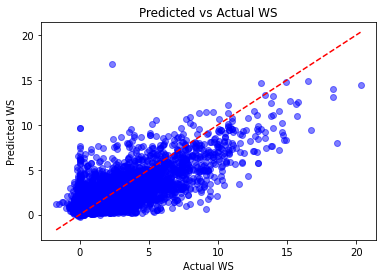

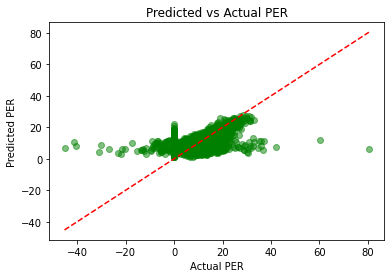

In [22]:
import matplotlib.pyplot as plt

# Scatter plot for WS predictions
plt.scatter(y_test_WS, predictions_WS, color='blue', alpha=0.5)
plt.plot([y_test_WS.min(), y_test_WS.max()], [y_test_WS.min(), y_test_WS.max()], color='red', linestyle='--')
plt.xlabel('Actual WS')
plt.ylabel('Predicted WS')
plt.title('Predicted vs Actual WS')
plt.show()

# Scatter plot for PER predictions
plt.scatter(y_test_PER, predictions_PER, color='green', alpha=0.5)
plt.plot([y_test_PER.min(), y_test_PER.max()], [y_test_PER.min(), y_test_PER.max()], color='red', linestyle='--')
plt.xlabel('Actual PER')
plt.ylabel('Predicted PER')
plt.title('Predicted vs Actual PER')
plt.show()

In [29]:
selected_columns = ['Player','Season', 'WS_Prediction', 'WS Next Season','PER_Prediction', 'PER Next Season', 'Similar Players']
selected_players = ['Kareem Abdul-Jabbar', 'Trae Young', 'Marvin Bagley III', 'Jayson Tatum', 'LeBron James', 
                    'Michael Jordan','Ben Simmons']

df1 = df_test[selected_columns].copy()
best_players = df1.loc[df1['Player'].isin(selected_players)]
best_players

,Player,Season,WS_Prediction,WS Next Season,PER_Prediction,PER Next Season,Similar Players
0,Kareem Abdul-Jabbar,1980.0,0.807232,1.1,10.113836,9.8,Darnell Valentine
357,Kareem Abdul-Jabbar,1981.0,0.412079,0.3,6.877116,0.0,John Williamson
720,Kareem Abdul-Jabbar,1982.0,1.374807,0.1,6.845876,13.0,Doc Rivers
1093,Kareem Abdul-Jabbar,1983.0,4.948315,6.6,8.835061,9.5,Derek Harper
1484,Kareem Abdul-Jabbar,1984.0,0.247892,0.0,10.943174,13.9,Tony Brown
1827,Kareem Abdul-Jabbar,1985.0,1.836156,0.4,8.790897,12.3,Alex English
1984,Michael Jordan,1985.0,1.959032,1.3,10.502278,9.9,Phil Smith
2189,Kareem Abdul-Jabbar,1986.0,0.749631,0.2,14.471757,15.3,Jim Paxson
2361,Michael Jordan,1986.0,0.330845,1.2,13.457869,11.2,Keith Smith
2568,Kareem Abdul-Jabbar,1987.0,2.514699,1.2,15.143525,15.8,Jawann Oldham


In [46]:
df1[df1['Player']=='Larry Bird']

,Player,Season,WS_Prediction,WS Next Season,PER_Prediction,PER Next Season,Similar Players
21,Larry Bird,1980.0,0.231012,0.0,10.581536,7.3,Dave Robisch
372,Larry Bird,1981.0,-0.059996,0.0,15.798533,18.0,George McGinnis
738,Larry Bird,1982.0,4.312776,0.7,13.244382,13.4,Leroy Combs
1114,Larry Bird,1983.0,1.515537,0.9,17.089369,17.7,Artis Gilmore
1499,Larry Bird,1984.0,1.796702,0.1,6.168273,0.0,Jim Petersen
1842,Larry Bird,1985.0,0.209624,1.8,14.056853,11.6,Ron Brewer
2207,Larry Bird,1986.0,0.647601,0.0,5.652533,20.6,Johnny Moore
2591,Larry Bird,1987.0,2.337129,2.8,15.126059,15.9,John Brown
2970,Larry Bird,1988.0,2.163640,5.3,10.702978,8.9,Wayman Tisdale
3402,Larry Bird,1989.0,4.742274,4.0,11.073870,0.0,Steve Hawes


In [37]:
df_test = df_test.sort_values(by='PER_Prediction', ascending=False)

In [45]:
df_test[df_test['Season'] > 1990]

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Player,Tm,OWS,WS Next Season,PER Next Season,WS_Prediction,PER_Prediction,diff_WS,diff_PER,diff_WS_binary,diff_PER_binary,Similar Players,Similarity
4426,5.0,21.0,54.0,1375.0,16.7,0.566,0.112,0.392,10.2,24.6,17.4,11.2,1.2,2.7,12.7,19.3,1.7,3.4,0.118,-1.1,-0.2,-1.3,0.2,1991.0,Stuart Gray,NYK,-0.1,2.1,29.7,3.534248,26.957359,-1.434248,2.742641,0,1,Ron Anderson,0.000000e+00
4405,1.0,27.0,37.0,1022.0,13.3,0.477,0.034,0.218,3.3,9.0,6.2,36.0,1.6,0.2,18.5,20.4,0.9,1.4,0.064,0.2,-0.6,-0.4,0.4,1991.0,Corey Gaines,DEN,0.3,2.1,25.8,1.812840,24.229633,0.287160,1.570367,0,0,Calvin Murphy,4.768372e-07
4588,5.0,20.0,47.0,766.0,14.9,0.539,0.288,0.259,8.8,24.0,16.3,7.4,0.8,7.0,13.7,17.8,1.4,1.7,0.106,-2.8,1.4,-1.4,0.1,1991.0,J.R. Reid,CHH,-0.3,2.5,18.1,2.404139,23.557071,0.095861,-5.457071,0,0,Rob Williams,4.768372e-07
4407,2.0,25.0,82.0,1568.0,13.6,0.518,0.330,0.157,2.6,8.5,5.7,10.0,2.3,0.8,9.8,22.2,1.9,3.1,0.093,-0.9,0.2,-0.8,0.5,1991.0,Winston Garland,LAC,0.4,1.6,21.5,2.622063,22.914277,-1.022063,-1.414277,0,0,Rolando Blackman,0.000000e+00
4485,4.0,28.0,65.0,1190.0,11.0,0.526,0.497,0.171,5.5,18.6,12.0,9.6,1.7,1.4,13.4,16.4,0.9,1.5,0.059,-1.8,0.2,-1.6,0.1,1991.0,Negele Knight,PHO,0.0,2.8,24.1,1.283310,22.561211,1.516690,1.538789,0,0,Alvan Adams,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,5.0,33.0,60.0,583.0,8.8,0.465,0.007,0.138,7.8,18.6,13.4,4.2,0.9,3.8,13.1,12.3,1.0,1.0,0.080,-4.3,1.4,-2.9,-0.1,1991.0,Larry Bird,BOS,3.0,0.7,0.0,0.628883,3.082379,0.071117,-3.082379,0,0,Darwin Cook,0.000000e+00
4353,5.0,37.0,7.0,36.0,17.6,0.553,0.500,0.400,9.8,18.3,14.2,12.2,1.4,6.4,14.5,17.5,0.1,0.1,0.165,1.2,3.3,4.5,0.1,1991.0,Earl Cureton,CHH,-0.2,1.1,0.0,0.186751,2.711122,0.913249,-2.711122,0,0,Mark Aguirre,4.214685e-08
4526,4.0,30.0,15.0,407.0,12.4,0.552,0.018,0.509,9.8,26.4,18.1,4.5,2.6,0.5,24.8,11.1,0.8,1.0,0.117,-2.5,1.8,-0.8,0.1,1991.0,Xavier McDaniel,SEA,0.4,3.3,5.8,1.169713,2.576659,2.130287,3.223341,1,1,Anthony Taylor,0.000000e+00
4523,4.0,30.0,45.0,934.0,13.7,0.536,0.113,0.209,3.0,5.4,4.2,10.3,0.9,0.7,8.1,20.9,0.4,2.0,0.105,0.1,-1.8,-1.7,0.1,1991.0,Tim McCormick,ATL,0.6,1.0,4.0,1.509480,2.366087,-0.509480,1.633913,0,0,Doug Collins,0.000000e+00
